In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from matplotlib.patches import Patch, Ellipse
from matplotlib.lines import Line2D


geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "s",
    "41a": "H"
}

custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ni',marker='o', color='#7BC8A4', lw=0, markersize=12,alpha=0.75),
    
    Line2D(range(1), range(1),label='Oct',marker='o',markeredgecolor='k', color='w', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='31a',marker='v',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='3a1',marker='^', markeredgecolor='k',color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='32a',marker='P',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='41a',marker='H',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='hexa',marker='s',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),

]

%matplotlib inline

In [2]:
valid_convergers = pickle.load(open("well_behaved_cats.p", "rb"))

valid_names = list(set([x.split("/")[4] for x in valid_convergers]))
print(len(valid_names))

# From geometry checking
bad_catalysts = ["Ni_32a_32", "Ni_3a1_10", "Co_3a1_9_", "Fe_31a_11", "Ni_oct_desorbed_4_", "Co_31a_9_" 
                "Cr_32a_33", "Cr_32a_35", "Co_3a1_11", "Ni_31a_9_", "Co_3a1_7_", "Cr_31a_16", "Fe_3a1_11",
                "Cr_3a1_27", "Fe_31a_9_", "Mn_31a_12", "Ni_31a_11", "Ni_31a_10", "Mn_3a1_18", "Cr_3a1_16", 
                 "Mn_3a1_15", "Cr_31a_17", "Cr_32a_33", "Cr_3a1_3_", "Cr_31a_8_", "Cr_3a1_9_", "Cr_3a1_8_"]

218


In [3]:
data = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/scaling_catalyst_data.p", 'rb'))

catnames = []
oh_values = []
ooh_values = []

for name in data:
    # We dont analyze these, they are from different set of catalysts.
    if "pbp" in name or "penta" in name or "hexa" in name:
        continue
    if name in bad_catalysts:
        continue
    catnames.append(name)
    oh_values.append(data[name][0])
    ooh_values.append(data[name][1])
    if "hexa" in name:
        print(name)
        print(data[name])

In [4]:
data

defaultdict(None,
            {'Fe_31a_17': (1.1693761728677394, 4.493845156752633),
             'Co_31a_23': (1.2811597877243788, 4.5663523810846804),
             'Cr_32a_35': (0.18083662407110618, 3.6510710912495368),
             'Mn_32a_35': (1.4848616069814495, 4.950716943558078),
             'Ru_32a_34': (0.7987008493778576, 4.093450358524953),
             'Mn_31a_23': (1.4022921511628226, 4.8759987929823865),
             'Fe_3a1_5_': (1.2702417576940277, 4.589074988530582),
             'Ni_3a1_5_': (1.7993467500296019, 5.023076137868064),
             'Cr_3a1_28': (-0.09253998489412059, 3.314501992291113),
             'Ru_3a1_1_': (0.9981712959378776, 4.147530567001222),
             'Fe_3a1_22': (1.3301367702427453, 4.75038879367643),
             'Co_penta_4': (1.546057868670984, 4.637059571292556),
             'Ni_3a1_24': (1.7963148558494422, 5.020607247551958),
             'Co_3a1_2_': (0.9369342171592738, 4.386104883821469),
             'Co_31a_30': (1.7104909165

In [5]:
len(oh_values)

182

Co_41a_1_
Co_41a_2_


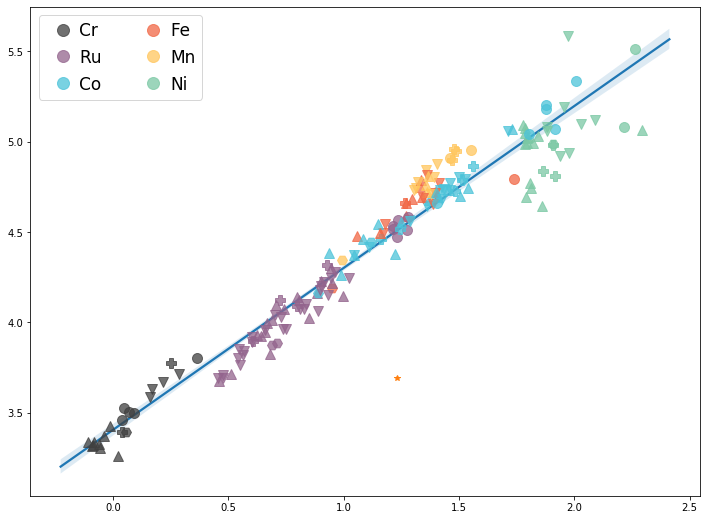

In [6]:
fig, ax = plt.subplots(figsize=(12,9))

ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

class2names = {
    "1": ["31a_1_", "31a_2_", "31a_3_", "31a_4_", "31a_5_","31a_6_",
         "3a1_1_", "3a1_2_", "3a1_3_", "3a1_4_", "3a1_5_","3a1_6_",
         "32a_31"],
    "2": ["31a_7_", "31a_8_", "31a_9_", "31a_10", "31a_11","31a_12",
         "3a1_7_", "3a1_8_", "3a1_9_", "3a1_10", "3a1_11","3a1_12",
         "32a_32"],
    "3": ["31a_13", "31a_14", "31a_15", "31a_16", "31a_17","31a_18",
         "3a1_13", "3a1_14", "3a1_15", "3a1_16", "3a1_17","3a1_18",
         "32a_33"],
    "4": ["31a_19", "31a_20", "31a_21", "31a_22", "31a_23","31a_24",
         "3a1_19", "3a1_20", "3a1_21", "3a1_22", "3a1_23","3a1_24",
         "32a_34"],
    "5": ["31a_25", "31a_26", "31a_27", "31a_28", "31a_29","31a_30",
         "3a1_25", "3a1_26", "3a1_27", "3a1_28", "3a1_29","3a1_30",
         "32a_35"],
    "6": ["oct_desorbed"],
    "7": ["41a"]
}

class2shapes = {
    "1": "v",
    "2": "^",
    "3": "P",
    "4": "D",
    "5": "X",
    "6": "o",
    "7": "s"
}

geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "s",
    "41a": "H"
}

custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ni',marker='o', color='#7BC8A4', lw=0, markersize=12,alpha=0.75),
    
]
#known_cats = ["Ru_oct_desorbed_1_", "Ru_oct_desorbed_2_", "Ru_oct_desorbed_3_",
#             "Ru_oct_desorbed_4_", "Ru_oct_desorbed_5_", "Ru_oct_desorbed_6_", "Mn_hexa_1", "Co_hexa_4",
#             "Ru_32a_31", "Ru_32a_34", "Fe_41a_2_", "Co_41a_1_", "Co_41a_2_"]

sns.regplot(oh_values, ooh_values, scatter_kws={'color':'w'})
for name, oh_val, ooh_val in zip(catnames, oh_values, ooh_values):
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    
    markeredgecolor=ele2color[name[:2]]
    if "Co_4" in name:
        print(name)
    #if name in known_cats:
    #    markeredgecolor='k'
    #else:
    #    markeredgecolor=ele2color[name[:2]]
    plt.plot(oh_val, ooh_val, alpha=0.75, color=color, marker=marker, markersize=10, markeredgecolor=markeredgecolor)
plt.plot(1.23, 3.69, marker='*')
ax.legend(handles=custom_lgd, fontsize=17, handletextpad=0, ncol=2, loc='upper left')
plt.savefig("tpssh_scaling.pdf")

In [7]:
for name, oh_val, ooh_val in zip(catnames, oh_values, ooh_values):
    if "Mn" in name and ooh_val<4.5:
        print(name)

Mn_41a_2_


In [8]:
count = 0
for name in catnames:
    if 1<data[name][0]<1.5 and "Co" in name:
        print("Binding energy for {} is {:.3f}".format(name, data[name][0]))
        

Binding energy for Co_31a_23 is 1.281
Binding energy for Co_31a_14 is 1.360
Binding energy for Co_3a1_24 is 1.149
Binding energy for Co_31a_6_ is 1.418
Binding energy for Co_32a_31 is 1.160
Binding energy for Co_3a1_30 is 1.408
Binding energy for Co_31a_15 is 1.429
Binding energy for Co_3a1_29 is 1.369
Binding energy for Co_3a1_10 is 1.399
Binding energy for Co_31a_17 is 1.461
Binding energy for Co_41a_1_ is 1.119
Binding energy for Co_oct_desorbed_3_ is 1.404
Binding energy for Co_31a_5_ is 1.110
Binding energy for Co_3a1_25 is 1.456
Binding energy for Co_32a_33 is 1.480
Binding energy for Co_3a1_5_ is 1.249
Binding energy for Co_31a_19 is 1.424
Binding energy for Co_31a_3_ is 1.042
Binding energy for Co_32a_34 is 1.243
Binding energy for Co_3a1_1_ is 1.044
Binding energy for Co_3a1_20 is 1.220
Binding energy for Co_31a_24 is 1.462
Binding energy for Co_31a_26 is 1.288
Binding energy for Co_31a_18 is 1.433
Binding energy for Co_3a1_26 is 1.400
Binding energy for Co_3a1_22 is 1.082


In [9]:
all_binding_enes = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/binding_energies.p", "rb"))

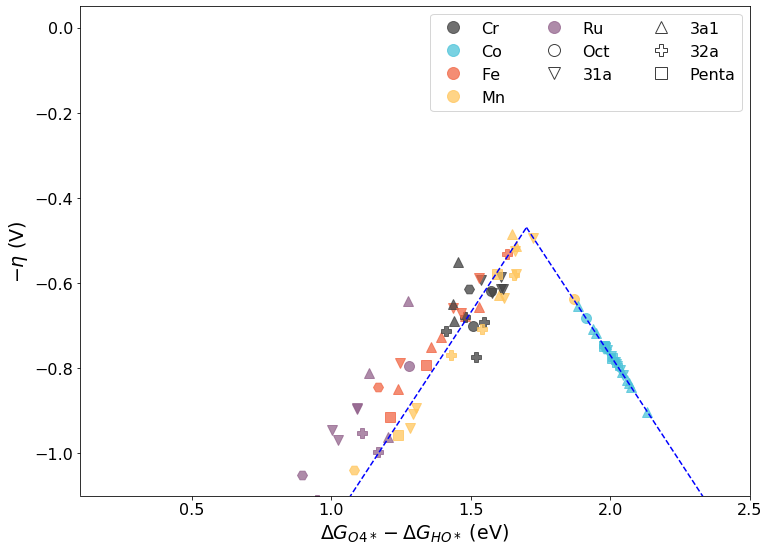

In [10]:
ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Oct',marker='o',markeredgecolor='k', color='w', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='31a',marker='v',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='3a1',marker='^', markeredgecolor='k',color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='32a',marker='P',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Penta',marker='s',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),

]

from collections import defaultdict
oer_desc = defaultdict(float)
overpotential = defaultdict(float)
oh_binding = []
oh_binding_dict = defaultdict(float)
oxo_binding_dict = defaultdict(float)
oxo_binding = []
binding_names = []

co_oh_binding = []
co_oh_binding_dict = defaultdict(float)
co_oxo_binding_dict = defaultdict(float)
co_oxo_binding = []
co_binding_names = []

cr_oh_binding = []
cr_oh_binding_dict = defaultdict(float)
cr_oxo_binding_dict = defaultdict(float)
cr_oxo_binding = []
cr_binding_names = []

for name_and_key in all_binding_enes:
    if all_binding_enes[name_and_key]['oxo'] is not None and all_binding_enes[name_and_key]['oxo']!=0.0:
        #print(all_binding_enes[name_and_key])
        oer_desc[name_and_key] = all_binding_enes[name_and_key]['oxo']-all_binding_enes[name_and_key]['OH']
        overpotential[name_and_key] = max(all_binding_enes[name_and_key]['oxo']-all_binding_enes[name_and_key]['OH'],
                           all_binding_enes[name_and_key]['OOH']-all_binding_enes[name_and_key]['oxo'],
                           all_binding_enes[name_and_key]['OH'])-1.23
        
        if "Co" not in name_and_key and "Cr" not in name_and_key:
            #print(name_and_key)
            binding_names.append(name_and_key)
            oh_binding.append(all_binding_enes[name_and_key]['OH'])
            oh_binding_dict[name_and_key] = all_binding_enes[name_and_key]['OH']
            oxo_binding_dict[name_and_key] = all_binding_enes[name_and_key]['oxo']
            oxo_binding.append(all_binding_enes[name_and_key]['oxo'])
        if "Cr" in name_and_key:# and "Cr" not in name_and_key:
            #print(name_and_key)
            cr_binding_names.append(name_and_key)
            cr_oh_binding.append(all_binding_enes[name_and_key]['OH'])
            cr_oh_binding_dict[name_and_key] = all_binding_enes[name_and_key]['OH']
            cr_oxo_binding_dict[name_and_key] = all_binding_enes[name_and_key]['oxo']
            cr_oxo_binding.append(all_binding_enes[name_and_key]['oxo'])
            
        if "Co" in name_and_key:
            #print(name_and_key)
            co_binding_names.append(name_and_key)
            co_oh_binding.append(all_binding_enes[name_and_key]['OH'])
            co_oh_binding_dict[name_and_key] = all_binding_enes[name_and_key]['OH']
            co_oxo_binding_dict[name_and_key] = all_binding_enes[name_and_key]['oxo']
            co_oxo_binding.append(all_binding_enes[name_and_key]['oxo'])


fig, ax = plt.subplots(figsize=(12,9))
ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Ru": "#93648D",
    "Cr": "#404040",
}

geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "s",
    "41a": "H"
}

def get_op_conventionally(oer_descriptor):
    return max(oer_descriptor - 1.7, 1.7 - oer_descriptor) + 0.47

filtered_down = []
for name in oer_desc:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    if oer_desc[name]<1.6:
        filtered_down.append(name)
        #print("Oer descriptor of: {:.3f} for {}, filtered to oxo5 if no similar geom.".format(oer_desc[name], name))
    #if -overpotential[name]>-0.6:
        #print("Oer descriptor of: {:.3f} for {:.3f}, OP of {}, Close to optimum dgo4-dgoh.".format(oer_desc[name],
        #                                                                                       overpotential[name],name))
#     for key in class2names:
#         for sub_name in class2names[key]:
#             if sub_name in name:
#                 marker=class2shapes[key]

    plt.plot(oer_desc[name], -overpotential[name], color=color, marker=marker, markersize=10, alpha=0.75)

ax.legend(handles=custom_lgd, fontsize=16., ncol=3)#, loc='upper right')#, handletextpad=0)
plt.xlabel("$\Delta{G_{O4*} - \Delta{G_{HO*}}}$ (eV)", fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylabel("$-\eta$ (V)", fontsize=19)
plt.plot([1, 1.7], [-.47-0.7, -.47], 'b--')
plt.plot([1.7, 2.4], [-.47, -.47-0.7], 'b--')
plt.ylim(-1.1, .05)
plt.xlim(0.1, 2.5)
plt.savefig("volcano_conventional_desc.pdf")

In [11]:
all_binding_enes["Co_3a1_10"]

defaultdict(float,
            {'OH': 1.3987454172822273,
             'oxo': 3.3369639145309007,
             'oxo5': 3.9966994255111707,
             'OOH': 4.708709636512847})

In [12]:
all_binding_enes["Mn_41a_2_"]

defaultdict(float,
            {'OH': 0.9944724503374515,
             'oxo': 2.07506381151087,
             'oxo5': 2.860165507651484,
             'OOH': 4.346009974379023})

In [13]:
for name in overpotential:
    if overpotential[name]<0.6 and ("Fe_" in name or "Mn" in name or "Cr" in name):
        print(name)
        print(overpotential[name])

Mn_32a_35
0.5812656153477556
Mn_31a_23
0.5797613691565839
Cr_3a1_25
0.5516925379467221
Fe_32a_35
0.5327819755160523
Cr_31a_28
0.586254553427803
Mn_hexa_4
0.5790454372269584
Mn_31a_25
0.5242258950108747
Cr_31a_17
0.5944005581221257
Mn_3a1_20
0.4849073268106663
Mn_3a1_28
0.5127503034007885
Mn_31a_26
0.4945205701945121
Fe_31a_29
0.5879119997956699


LinregressResult(slope=1.024046304200121, intercept=1.9731818451224596, rvalue=0.9696615300870367, pvalue=3.4376311957782286e-16, stderr=0.052697067238011555)
LinregressResult(slope=1.7051961856251427, intercept=0.5498955252741144, rvalue=0.9417728675770421, pvalue=1.5467411009777136e-20, stderr=0.09626315644079497)
LinregressResult(slope=1.2253411259558116, intercept=1.4901499613076323, rvalue=0.9214555272981013, pvalue=1.0690014110215328e-06, stderr=0.14327946032805114)


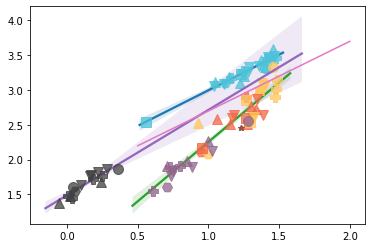

In [14]:
from scipy.stats import linregress

sns.regplot(co_oh_binding, co_oxo_binding, 'b-', scatter_kws={'color':'w'})
plt.plot(1.23, 2.46,'*')
for name in co_binding_names:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    #for key in class2names:
   #     for sub_name in class2names[key]:
   #         if sub_name in name:
   #             marker=class2shapes[key]
    plt.plot(co_oh_binding_dict[name], co_oxo_binding_dict[name], color=color, marker=marker, markersize=10, alpha=0.75)

sns.regplot(oh_binding, oxo_binding, 'p-', scatter_kws={'color':'w'})
plt.plot(1.23, 2.46,'*')
for name in binding_names:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
#     for key in class2names:
#         for sub_name in class2names[key]:
#             if sub_name in name:
#                 marker=class2shapes[key]
    plt.plot(oh_binding_dict[name], oxo_binding_dict[name], color=color, marker=marker, markersize=10, alpha=0.75)

sns.regplot(cr_oh_binding, cr_oxo_binding, 'p-', scatter_kws={'color':'w'})
plt.plot(1.23, 2.46,'*')
for name in cr_binding_names:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
#     for key in class2names:
#         for sub_name in class2names[key]:
#             if sub_name in name:
#                 marker=class2shapes[key]
    plt.plot(cr_oh_binding_dict[name], cr_oxo_binding_dict[name], color=color, marker=marker, markersize=10, alpha=0.75)

print(linregress(co_oh_binding, co_oxo_binding))
print(linregress(oh_binding, oxo_binding))
print(linregress(cr_oh_binding, cr_oxo_binding))

plt.plot([0.5, 2], [2.2, 3.7])

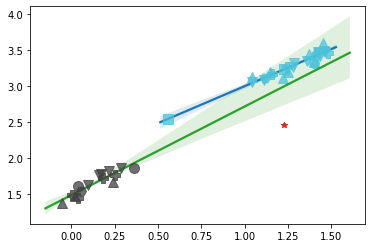

In [15]:
sns.regplot(co_oh_binding, co_oxo_binding, 'b-', scatter_kws={'color':'w'})
plt.plot(1.23, 2.46,'*')
for name in co_binding_names:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    #for key in class2names:
   #     for sub_name in class2names[key]:
   #         if sub_name in name:
   #             marker=class2shapes[key]
    plt.plot(co_oh_binding_dict[name], co_oxo_binding_dict[name], color=color, marker=marker, markersize=10, alpha=0.75)

sns.regplot(cr_oh_binding, cr_oxo_binding, 'p-', scatter_kws={'color':'w'})
plt.plot(1.23, 2.46,'*')
for name in cr_binding_names:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
#     for key in class2names:
#         for sub_name in class2names[key]:
#             if sub_name in name:
#                 marker=class2shapes[key]
    plt.plot(cr_oh_binding_dict[name], cr_oxo_binding_dict[name], color=color, marker=marker, markersize=10, alpha=0.75)


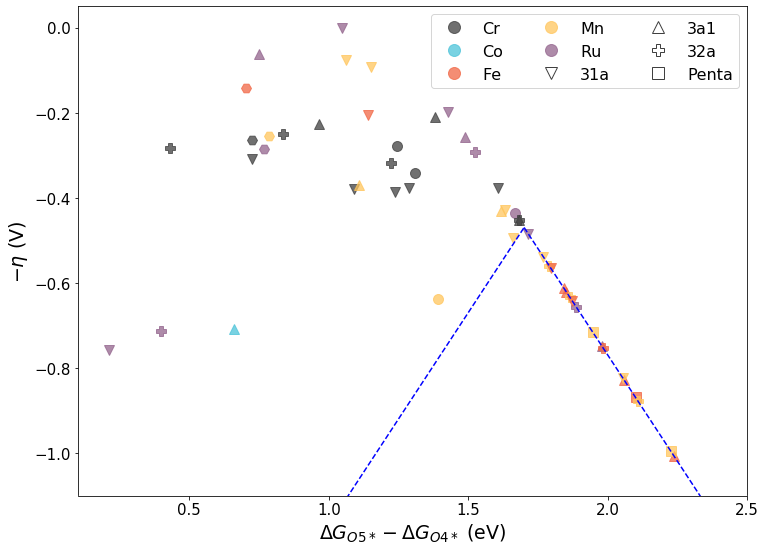

In [16]:
from collections import defaultdict
new_oer_desc = defaultdict(float)
for name_and_key in all_binding_enes:
    if all_binding_enes[name_and_key]['oxo']!=0.0 and all_binding_enes[name_and_key]['oxo5']!=0.0:
        new_oer_desc[name_and_key] = all_binding_enes[name_and_key]['oxo5']-all_binding_enes[name_and_key]['oxo']
        overpotential[name_and_key] = max(all_binding_enes[name_and_key]['oxo']-all_binding_enes[name_and_key]['OH'],
                           all_binding_enes[name_and_key]['OOH']-all_binding_enes[name_and_key]['oxo5'],
                            all_binding_enes[name_and_key]['oxo5']-all_binding_enes[name_and_key]['oxo'],
                           all_binding_enes[name_and_key]['OH'], 1.23)-1.23
ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

        
custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    #Line2D(range(1), range(1),label='Oct',marker='o',markeredgecolor='k', color='w', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='31a',marker='v',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='3a1',marker='^', markeredgecolor='k',color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='32a',marker='P',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Penta',marker='s',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),

]

fig, ax = plt.subplots(figsize=(12,9))

ele2color = {
    "Fe": "#F16745",
    "Mn": "#FFC65D",
    "Ru": "#93648D",
    "Cr": "#404040",
    "Co": "#4CC3D9",

}

geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "s",
    "41a": "H"
}


def get_op_newly(new_oer_descriptor):
    return abs(new_oer_descriptor - 1.23)#, 1.6 - new_oer_descriptor) + 0.37 
have_oxo5 = []
#sns.regplot(oh_values, ooh_values, scatter_kws={'color':'w'})
for name in new_oer_desc:
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
#     for key in class2names:
#         for sub_name in class2names[key]:
#             if sub_name in name:
#                 marker=class2shapes[key]

    #plt.plot(new_oer_desc[name], -get_op_newly(new_oer_desc[name]), color=color, marker=marker, markersize=10)
    plt.plot(new_oer_desc[name], -overpotential[name], color=color, marker=marker, markersize=10, alpha=0.75)
    have_oxo5.append(name)
#plt.plot(1.23, 3.69, marker='*')
ax.legend(handles=custom_lgd, fontsize=16, ncol=3)
plt.xlabel("$\Delta{G_{O5*} - \Delta{G_{O4*}}}$ (eV)", fontsize=19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([1, 1.7], [-.47-0.7, -.47], 'b--')
plt.plot([1.7, 2.4], [-.47, -.47-0.7], 'b--')
#plt.axvline(1.6)
plt.ylim(-1.1, .05)
#plt.axhline(-0.6)
plt.xlim(0.1, 2.5)

plt.ylabel("$-\eta$ (V)", fontsize=19)
plt.savefig("volcano_new_desc.pdf")

In [17]:
all_binding_enes["Co_3a1_10"]

defaultdict(float,
            {'OH': 1.3987454172822273,
             'oxo': 3.3369639145309007,
             'oxo5': 3.9966994255111707,
             'OOH': 4.708709636512847})

In [18]:
all_binding_enes["Cr_32a_33"]

defaultdict(float,
            {'OH': 0.005079552034270483,
             'oxo': 1.4847758910730582,
             'oxo5': 2.3208219539535677,
             'OOH': 3.3960297957266814})

In [19]:
set(filtered_down).difference(set(have_oxo5))

{'Fe_31a_18', 'Fe_3a1_17', 'Mn_31a_17'}

In [20]:
all_binding_enes["Co_3a1_10"]

defaultdict(float,
            {'OH': 1.3987454172822273,
             'oxo': 3.3369639145309007,
             'oxo5': 3.9966994255111707,
             'OOH': 4.708709636512847})

LinregressResult(slope=1.2209750664624375, intercept=3.094829097614542, rvalue=0.9738750681506794, pvalue=9.003214468610476e-25, stderr=0.047450381778483305)


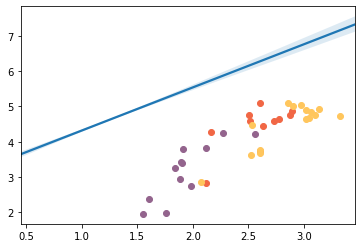

In [21]:
all_oxo5 = []
all_oxo4 = []
all_oh = []
all_ooh = []

cr_oxo4 = []
cr_oh = []

not_cr_oxo4 = []
not_cr_oh = []

for name_and_key in all_binding_enes:
    if all_binding_enes[name_and_key]['oxo5']!=0 and "Co" not in name_and_key and "Cr" not in name_and_key:
        color = ele2color[name_and_key[:2]]
        for key in geom2shape:
            if key in name:
                marker = geom2shape[key]
        for key in class2names:
            for sub_name in class2names[key]:
                if sub_name in name:
                    marker=class2shapes[key]
        plt.plot(all_binding_enes[name_and_key]['oxo'], all_binding_enes[name_and_key]['oxo5'], 'o',
                color=color)
        if "Cr" in name_and_key:
            cr_oxo4.append(all_binding_enes[name_and_key]['oxo'])
            cr_oh.append(all_binding_enes[name_and_key]['OH'])
        else:
            not_cr_oxo4.append(all_binding_enes[name_and_key]['oxo'])
            not_cr_oh.append(all_binding_enes[name_and_key]['OH'])
        
        all_oxo4.append(all_binding_enes[name_and_key]['oxo'])
        all_oh.append(all_binding_enes[name_and_key]['OH'])
        all_oxo5.append(all_binding_enes[name_and_key]['oxo5'])
        all_ooh.append(all_binding_enes[name_and_key]['OOH'])

sns.regplot(all_oh, all_ooh, 'p-', scatter_kws={'color':'w'})
linregress(all_oxo4, all_oxo5)
print(linregress(all_oh, all_ooh))

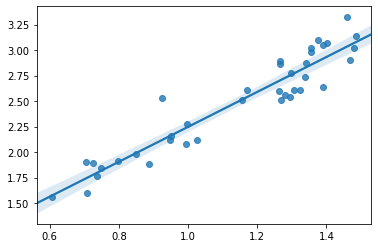

In [22]:
sns.regplot(all_oh, all_oxo4)

LinregressResult(slope=1.7119828375396426, intercept=0.534988906971583, rvalue=0.9468783368270375, pvalue=2.547760589249428e-19, stderr=0.0969079069899062)
LinregressResult(slope=1.2209750664624375, intercept=3.094829097614542, rvalue=0.9738750681506794, pvalue=9.003214468610476e-25, stderr=0.047450381778483305)


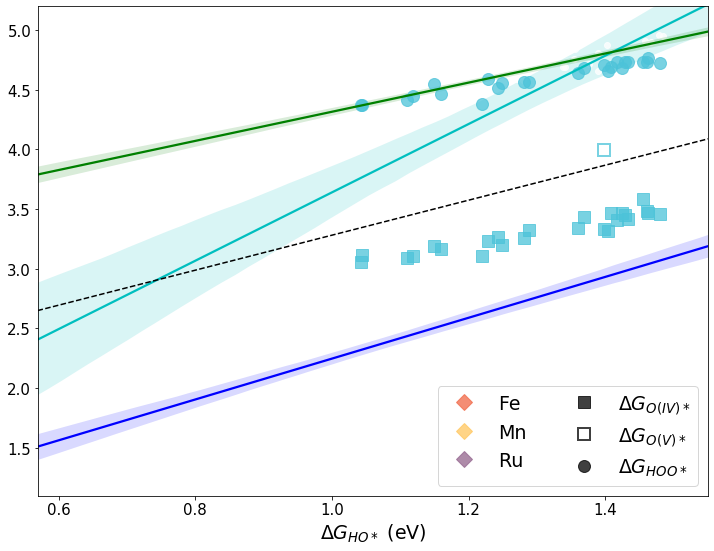

In [23]:
fig, ax = plt.subplots(figsize=(12,9))

for name_and_key in all_binding_enes:
    if all_binding_enes[name_and_key]['oxo']!=0.0 and "Co" in name_and_key or "Cr" in name_and_key:# and oer_desc[name_and_key]<1.6:
        color = ele2color[name_and_key[:2]]
        for key in geom2shape:
            if key in name:
                marker = geom2shape[key]
        for key in class2names:
            for sub_name in class2names[key]:
                if sub_name in name:
                    marker=class2shapes[key]
        if "Mn_41a_2" in name_and_key:
            print(all_binding_enes[name_and_key])
        plt.plot(all_binding_enes[name_and_key]['OH'], all_binding_enes[name_and_key]['oxo'], alpha=0.75,
                color=color, marker='s', markersize=12)
        plt.plot(all_binding_enes[name_and_key]['OH'], all_binding_enes[name_and_key]['oxo5'], alpha=0.75,
            color='w', markeredgecolor=color, marker='s', markersize=12, markeredgewidth=2)
        plt.plot(all_binding_enes[name_and_key]['OH'], all_binding_enes[name_and_key]['OOH'], alpha=0.75,
                color=color, marker='o', markersize=12)


        
sns.regplot(all_oh, all_oxo4, color='b',ci=95, scatter_kws={'color':'w'})
sns.regplot(all_oh, all_oxo5, color='c',ci=95, scatter_kws={'color':'w'})
sns.regplot(all_oh, all_ooh, color='g', ci=95, scatter_kws={'color':'w'})

#print(linregress(oxo4, oxo5))
#sns.regplot(oh, ooh, color='k', scatter_kws={'color':'w'})
print(linregress(all_oh, all_oxo4))
oh_oxo4_slope = linregress(all_oh, all_oxo4)[0]
oh_ooh_slope = linregress(all_oh, all_ooh)[0]
oh_oxo4_intercept = linregress(all_oh, all_oxo4)[1]
oh_ooh_intercept = linregress(all_oh, all_ooh)[1]

oh_inputs = np.linspace(0.5, 1.6, 20)

final_vals = [oh_oxo4_slope*x+oh_oxo4_intercept + (oh_ooh_slope*x+oh_ooh_intercept-oh_oxo4_slope*x-oh_oxo4_intercept)*0.5
              for x in oh_inputs]

#print(linregress(all_oh, all_oxo5))
print(linregress(all_oh, all_ooh))
#sns.regplot(co_oh_binding, co_oxo_binding, color='c', ci=50, scatter_kws={'color':'w'})
plt.xlabel("$\Delta{G_{HO*}}$ (eV)", fontsize=19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
        
custom_lgd = [
    Line2D(range(1), range(1),label='Fe',marker='D', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='D', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='D', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='$\Delta{G_{O(IV)*}}$',marker='s',  
           color='k', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='$\Delta{G_{O(V)*}}$',marker='s', color='w',
           markeredgecolor='k', lw=0, markersize=12,alpha=0.75, markeredgewidth=2),
    Line2D(range(1), range(1),label='$\Delta{G_{HOO*}}$',marker='o',
           color='k', lw=0, markersize=12,alpha=0.75),


]
plt.xlim(0.57, 1.55)
plt.ylim(1.1,5.2)
plt.plot(oh_inputs, final_vals, 'k--', label='ideal')
plt.legend(handles=custom_lgd, fontsize=19, ncol=2)
plt.savefig("scaling_together.pdf")
#print(linregress(all_oxo4, all_oh))
#print(linregress(all_oxo4, all_oxo5))
#print(linregress(all_oxo4, all_ooh))


In [24]:
for name in overpotential:
    if overpotential[name]<0.1:
        print(name)
        print(overpotential[name])
        print(all_binding_enes[name])

Mn_31a_18
0.0753605184214774
defaultdict(<class 'float'>, {'OH': 1.3053605184214774, 'oxo': 2.6095299938706225, 'oxo5': 3.670208884898466, 'OOH': 4.734725367600522})
Ru_31a_13
0.0
defaultdict(<class 'float'>, {'OH': 0.8861454996271086, 'oxo': 1.8881013570792178, 'oxo5': 2.9356159170035654, 'OOH': 4.063491423475183})
Mn_31a_15
0.0937254922855355
defaultdict(<class 'float'>, {'OH': 1.3237254922855355, 'oxo': 2.60668204873952, 'oxo5': 3.756426845221614, 'OOH': 4.778917769650994})
Ru_3a1_13
0.06144731358023847
defaultdict(<class 'float'>, {'OH': 0.8499252214200458, 'oxo': 1.985378302472791, 'oxo5': 2.734835785758943, 'OOH': 4.026283099339182})


In [25]:
for name in all_binding_enes:
    if "Mn" in name and all_binding_enes[name]["OH"]<1.:
        print(name)

Mn_3a1_18
Mn_41a_2_


In [26]:
metal2op = defaultdict(list)
for key in overpotential:
    metal2op[key[:2]].append(overpotential[key])
for m in metal2op:
    print(m)
    print(sum(metal2op[m])/len(metal2op[m]))

Fe
0.6793641037135532
Co
0.7738863245748
Cr
0.3271575459966139
Mn
0.5488775402773649
Ru
0.4077375769334297


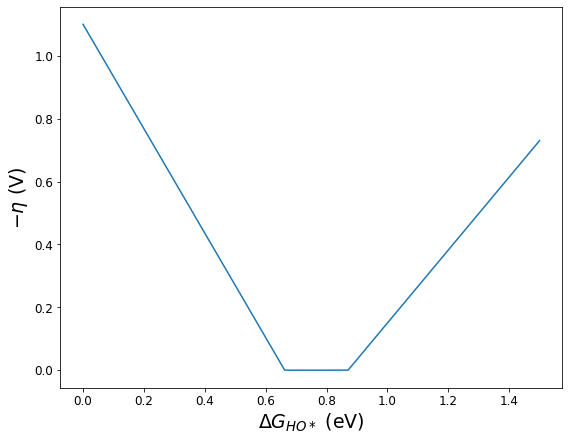

In [27]:
def return_op_from_dgoh(dgoh):
    #return max(dgoh-1.23, 0.7*dgoh+0.57-1.23, 1.09*dgoh+0.33-1.23, -1.89*dgoh+2.5-1.23, 4.92-0.9*dgoh-3.4-1.23, 0)
    return max(dgoh-1.23, 0.7*dgoh+0.55-1.23, 1.16*dgoh+0.22-1.23, -1.66*dgoh+2.33-1.23, 4.92-1.2*dgoh-3.1-1.23, 0)

#def return_op_from_dgoh(dgoh):
#    return (max(dgoh, 0.7*dgoh+0.57, -0.8*dgoh+2.83, 4.92-0.9*dgoh-3.2)-1.23)

def return_op_from_dgo(dgo):
    return max(0.6*dgo-0.35, dgo, 0.88*dgo-0.45, -1.13*dgo+3.1, 4.92-0.75*dgo-2.65, )-1.23

range_oh = np.linspace(-0, 1.5, 1000)
opz = [return_op_from_dgoh(dg) for dg in range_oh]
plt.figure(figsize=(9,7))
plt.plot(range_oh, opz)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("$\Delta{G_{HO*}}$ (eV)", fontsize=19)
plt.ylabel("$-\eta$ (V)", fontsize=19)

plt.savefig("optimum_dgoh.pdf")

In [28]:
for name in all_binding_enes:
    if "Ni" in name and all_binding_enes[name]["OH"]<1.5:
        print(all_binding_enes[name])
        print(name)
        

defaultdict(<class 'float'>, {'OH': 1.4234291503505347, 'OOH': 4.724245985352036, 'oxo': 0.0, 'oxo5': 0.0})
Ni_31a_9_
defaultdict(<class 'float'>, {'OH': 1.367582922011609, 'OOH': 4.6258130996728, 'oxo': 0.0, 'oxo5': 0.0})
Ni_32a_32
defaultdict(<class 'float'>, {'OH': 1.447429060911005, 'OOH': 4.752633462051906, 'oxo': 0.0, 'oxo5': 0.0})
Ni_31a_11
defaultdict(<class 'float'>, {'OH': 1.3933047699688885, 'OOH': 4.735305514650893, 'oxo': 0.0, 'oxo5': 0.0})
Ni_31a_10
defaultdict(<class 'float'>, {'OH': 1.214679072151481, 'OOH': 4.686405268279528, 'oxo': 0.0, 'oxo5': 0.0})
Ni_3a1_10


In [29]:
for name in overpotential:
    if overpotential[name]<0.3 and ("Fe_" in name or "Mn" in name or "Cr" in name):
        if all_binding_enes[name]["OOH"]-all_binding_enes[name]["oxo5"]<1:
            print(name)
            print(overpotential[name])
            print(all_binding_enes[name]["OOH"]-all_binding_enes[name]["oxo5"])

Fe_31a_17
0.20609687337898963
0.7489616595158908
Cr_3a1_25
0.22611657247494277
0.8181305892896411
Cr_3a1_20
0.2112376510739331
0.5381100449137239
Cr_oct_desorbed_1_
0.27834694998431564
0.6886138492893932


In [30]:
all_binding_enes["Ni_oct_desorbed_4_"]

defaultdict(float,
            {'OH': 2.2309688066679665,
             'OOH': 4.914159788224011,
             'oxo': 0.0,
             'oxo5': 0.0})

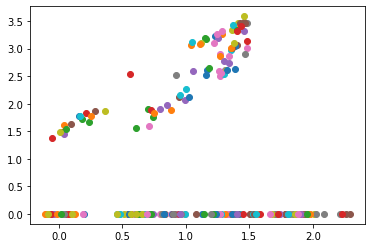

In [31]:
for name in all_binding_enes:
    plt.plot(all_binding_enes[name]['OH'], all_binding_enes[name]['oxo'], 'o')

In [32]:
for name in all_binding_enes:
    if overpotential[name]<0.6 and ("Mn" in name or "Fe" in name or "Cr" in name) and all_binding_enes[name]["oxo"]!=0:
        if "penta" in name or "hexa" in name or all_binding_enes[name]["oxo"]-all_binding_enes[name]["OH"]<1.5:
            continue
            
        print(name)
        print(all_binding_enes[name])
        #print(len(all_binding_enes[name]))

Cr_32a_35
defaultdict(<class 'float'>, {'OH': 0.18083662407110618, 'oxo': 1.7286327569740634, 'oxo5': 2.9526091641913017, 'OOH': 3.6510710912495368})
Mn_32a_35
defaultdict(<class 'float'>, {'OH': 1.4848616069814495, 'oxo': 3.1394513282103222, 'oxo5': 4.929866768561682, 'OOH': 4.950716943558078})
Mn_31a_23
defaultdict(<class 'float'>, {'OH': 1.4022921511628226, 'oxo': 3.0662374238258026, 'oxo5': 4.83487285962018, 'OOH': 4.8759987929823865})
Cr_31a_28
defaultdict(<class 'float'>, {'OH': 0.1605050823312598, 'oxo': 1.7688903905876647, 'oxo5': 2.8587126910130807, 'OOH': 3.5851449440154677})
Mn_3a1_18
defaultdict(<class 'float'>, {'OH': 0.9257193107514341, 'oxo': 2.52634311138808, 'oxo5': 3.635458566522312, 'OOH': 4.384536962953282})
Mn_31a_25
defaultdict(<class 'float'>, {'OH': 1.3900383135202694, 'oxo': 3.049956298981043, 'oxo5': 4.679882167499847, 'OOH': 4.804182193991918})
Cr_31a_24
defaultdict(<class 'float'>, {'OH': 0.21621906325408338, 'oxo': 1.8237912948831396, 'oxo5': 3.112684034280